<a href="https://colab.research.google.com/github/a-afonso/03MAIR-Algoritmos-de-optimizacion/blob/master/Utilidades/Seminario_Problema_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        Id       Peso  Sexo
0        0  34.419971     0
1        1  41.032026     1
2        2  35.130366     0
3        3  37.178055     1
4        4  32.374136     0
5        5  39.425123     0
6        6  38.301500     1
7        7  36.960132     1
8        8  35.166750     0
9        9  36.826502     0
10      10  35.091403     1
11      11  35.925779     1
12      12  36.398897     0
13      13  35.648114     0
14      14  36.963224     0
15      15  37.412992     0
16      16  35.698375     0
17      17  37.130847     1
18      18  38.044507     0
19      19  35.581875     1
20      20  43.463256     1
21      21  34.639026     1
22      22  35.837120     0
23      23  36.784157     0
24      24  35.335062     1
25      25  37.978391     0
26      26  37.912370     0
27      27  38.460180     1
28      28  37.637233     0
29      29  40.943997     0
...    ...        ...   ...
2970  2970  36.116509     1
2971  2971  38.331243     1
2972  2972  37.663983     0
2973  2973  38.01682

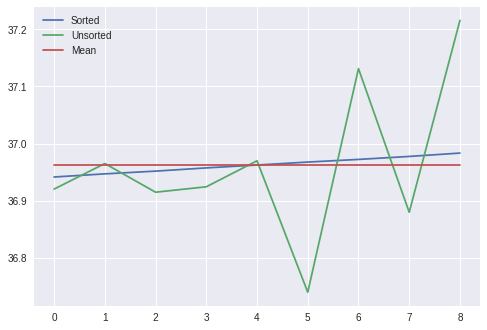

In [19]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

# Inicialización de variables globales
nAnimals = 3000
nTreats = 3
nGroups = 3

# Creación de un dataset de muestra
MUESTRA = pd.DataFrame()
MUESTRA["Id"] = [i for i in range(nAnimals)]
MUESTRA["Peso"] = [random.gauss(37, 2.1) for i in range(nAnimals)]
MUESTRA["Sexo"] = [random.getrandbits(1) for i in range(nAnimals)]

# Dividimos el dataset en dos listas, una para cada sexo
MALE = []
FEMALE = []

for index, row in MUESTRA.iterrows():
  if row["Sexo"] == 0:
    MALE.append([row["Id"], row["Peso"], 0])
  else:
    FEMALE.append([row["Id"], row["Peso"], 0])
   
print(MUESTRA)
print()
for r in MALE: 
  print(r)
print()
for r in FEMALE: 
  print(r)
print()

# Calcula el número máximo de animales por grupo
nMale = len(MALE)
nFemale = len(FEMALE)

nAnimalsGroup = min(nMale, nFemale) // (nTreats * nGroups)

# Función para imprimir tres series de datos
def print_graph(S, US, M):
  fig, axes = plt.subplots(1, 1)
  axes.plot(np.arange(len(S)), S) 
  axes.plot(np.arange(len(US)), US)
  axes.plot(np.arange(len(M)), M)
  plt.legend(['Sorted', 'Unsorted', 'Mean'], loc='best') 
  plt.show()

# Función para agrupar una lista de cualquier sexo
def group_animals(L, nTreats, nGroups, nAnimalsGroup):
  
  RES = []
  
  # Calcula el peso medio
  p_medio = np.mean(L, axis=0)[1]
  
  # Calcula el número total de grupos
  nTotalGroups = nTreats * nGroups
  
  # Calcula el número de animales de la lista
  nAnimalsSex = nTotalGroups * nAnimalsGroup
  
  # Ordenamos la muestra por diferencias con respecto a la media
  # y excluímos los más distantes 
  for a in L:
    a[2] = abs(p_medio - a[1])
  L = sorted(L, key=lambda x : x[2])
  L = L[0:nAnimalsSex]
  LUNSORTED = sorted(L, key=lambda x : x[0])
  
  # Ordenamos la muestra por peso
  LSORTED = sorted(LUNSORTED, key=lambda x : x[1])
  
  for i in LSORTED:
    print(i)
  
  print("Grupos:", nTotalGroups)
  print("Animales:", nAnimalsGroup)
  
  p_medio = np.mean(LSORTED, axis=0)[1]
  for i in range(nTotalGroups):
    G = []
    for j in range(i, nAnimalsSex, nTotalGroups):
      G.append(LSORTED[j][1])
    m = np.mean(G)
    G.append(m)
    G.append(abs(p_medio - m))
    G.append(p_medio)
      
    RES.append(G)
    
  p_medio = np.mean(LUNSORTED, axis=0)[1]
  for i in range(nTotalGroups):
    G = []
    for j in range(i, nAnimalsSex, nTotalGroups):
      G.append(LUNSORTED[j][1])
    m = np.mean(G)
    G.append(m)
    G.append(abs(p_medio - m))
    G.append(p_medio)
      
    RES.append(G)
  
  return RES
  
R = group_animals(MALE, nTreats, nGroups, nAnimalsGroup)  

print(nAnimals, nTreats, nGroups)
for r in R: 
  print(r)

S = []
US = []
M = []
for i in range(len(R)):
  if i < (len(R)//2):
    S.append(R[i][-3])
  else:
    US.append(R[i][-3])
    M.append(R[i][-1])
    
print_graph(S, US, M)  


